同じデータに対して、全く同じ結果を出力するプログラムを決定的（deterministic）

確率を用いたプログラム

In [2]:
import random
def rollDie():
    return random.choice([1, 2, 3, 4, 5, 6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [6]:
rollN(6)

135661


## 推測統計
原理は、ランダムサンプルの性質が母集団全体の性質を代表する傾向にあるということ

In [7]:
import random
def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
        return heads/numFlips
    
def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [21]:
print('mean=', flipSim(10, 1))

mean= 0.1


In [19]:
print('mean=', flipSim(10, 100))

mean= 0.050999999999999976


In [18]:
print('mean=', flipSim(100, 100000))

mean= 0.005004899999996898


ここで根拠にしているのが大数の法則（ベルヌーイの定理）
独立思考において、各思考で特定の事象が起こる確率をpとする（例：1回のコイン投げで主は0.5）

大数の法則とは、実際に思考を繰り返す中でその事象が起こる割合とpの差が試行の回数が無限に近づくとき0に収束するというもの。

注意したいのは、大数の法則が意味するところは、多くの人が考えているように結果に隔たりが出たときに、その隔たりが将来的にぎゃくの隔たりにより相殺されるということではない。
大数の法則の誤った解釈あh賭博者の誤謬（Gambler's fallacy）として知られる

賭博者の誤謬は、平均への回帰と誤解されることが多い。
平均への回帰（regression to the mean)とは、曲間な確率自称が怒ったあとであhより極端でない自称が起こりやすい。

In [56]:
import matplotlib.pyplot as plt
def regressToMean(numFlips, numTrials):
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    extremes, nextTrials = [], []
    for i in range(len(fracHeads) - 1):
        if fracHeads[i] < 0.33 or fracheads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i + 1])
            
    plt.plot(range(len(extremes)), extremes, 'ko', label = 'Next Trial')
    plt.plot(range(len(nextTrials)), nextTrials, 'k^', label = 'Next Trial')
    plt.axhline(0.5)
    plt.ylim(0,1)
    plt.xlim(-1, len(extremes) + 1)
    plt.xlabel('Extreme Example and Next Trial')
    plt.ylabel('Fraction Heads')
    plt.title('Regression to the Mean')
    plt.legend(loc = 'best')
    plt.show()

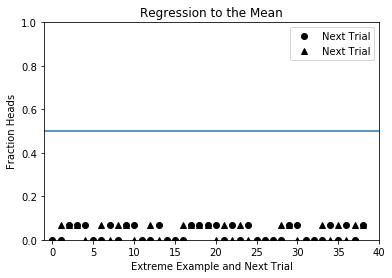

In [57]:
regressToMean(15, 40)

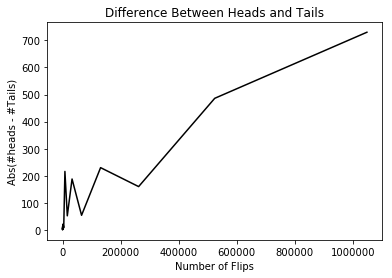

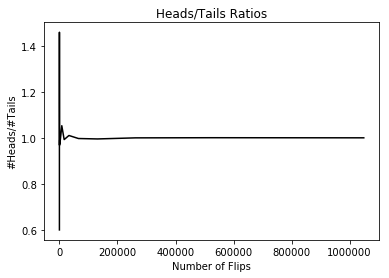

In [53]:
def flipPlot(minExp, maxExp):
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'k')
    
random.seed(0)
flipPlot(4, 20)
plt.show()

variance(X) = $$\begin{align}\sum_{xeX}\frac{(x - \mu)^2}{|X|}\end{align}$$

variance(X) = $$\begin{align}\sum_{xeX}\frac{(x - \mu)^2}{|X|}\end{align}$$

## 標準偏差

In [40]:
def variance(X):
    mean = sum(x)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5

In [52]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style, logX = False, logY = False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()
        
def runTrial(numFlops):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            numHeads += 1
    numTails = numFlops - numHeads
    return(numHeads, numHeads)

def flipPlot1(minExp, maxExp, numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffsMeans.append(sum(diffs)/numTrails)
            ratiosSDs.append(stdDev(ratio))
            diffsSDs.append(stdDev(diffs))
    numTrialsString = '('+ str(numTrails) + 'Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'number of flips', 'Mean Heads/Tails Ratios', 'ko', logX = True)
    title = 'SD Heads_Tails Ratios' + numTrialsString
    plt.show()

### 変動係数（confficient of variation）
標準偏差を平均で割ったものである。平均が異なるデータを比較するとき、変動係数は標準偏差より役に立つ

In [43]:
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(x)/mean
    except ZeroDivisionError:
        return flaot('nan')


### 分布

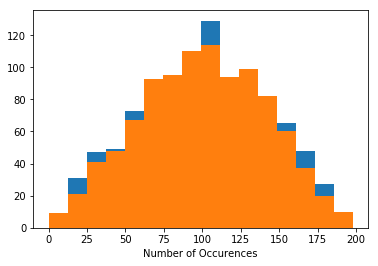

In [51]:
import numpy as np
import matplotlib.pyplot as plt
vals = []
for i in range(1000):
    num1 = random.choice(range(0, 101))
    num2 = random.choice(range(0, 101))
    vals.append(num1 + num2)
plt.hist(vals, bins = 16)
plt.xlabel('Number of Occurences')
plt.show()

## 確率分布
ヒストグラムは度数分布（Frequency distribution）を表示する手法の1つだ。

確率分布（Probability distribution）により、確率変数の値がある範囲に含まれる確率を計算できるので相対頻度がワkラウ

確率分布は確率変数が離散であるか、連続であるかによって、離散確率分布と連続確率分布の2つに分けられる

離散確率変数（Discrete probability variable）はたとえばサイコロ投げのように有限集合上に値を取る。

連続確率変数（Continuous random variable）はたとえば時速0キロからその車の最高時速のように、任意の2つの次数にはさまれた区間にある無限この実数をとる

連続確率分布はややこしく、確率変数は無限この値を取りうるので、特定の値をとる確率は通常0となる。例えば、ある車が時速１３０．００４２キロで走る確率は０だ。

このバイ、確率密度関数（Probability density function（PDF））を用いて説明する。PDFは確率変数が２つの値の間に含まれる確率を表す。確率変数の最小値と最大値の間で定義される関数が表す曲線である。

In [65]:
# 正規分布
#random.gauss(mu, sigma)

In [69]:
import scipy.integrate as integrate
print(scipy.integrate.quad(abs, 0, 5)[0])

12.5


In [74]:
#　経験則
def gaussian(x, sigma):
    factor1 = (1.0/sigma*((2*pylab.pi)**0.5))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

def checkEmpirical(numTrials):
    for i in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =',mu, 'and sigma =', sigma)
        for numStd in (1, 2, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
            print('Fraction within ', numStd, 'std=', round(area, 4))
        checkEmpirical(3)

In [77]:
# # エラーバー
# pylab.errorbar(xVals, means, yerr = 1.96*pylab.array(sds))

NameError: name 'x' is not defined

### 指数分布と幾何学分布

In [78]:
def clear(n, p, steps):
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Mokecules Remaining')
    pylab.title('Clearance of Drug')

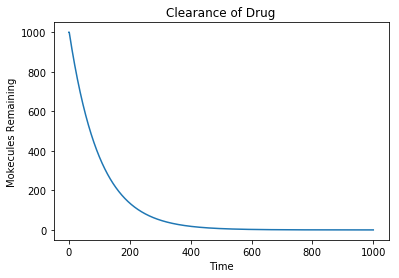

In [79]:
plt.show(clear(1000, 0.01, 1000))

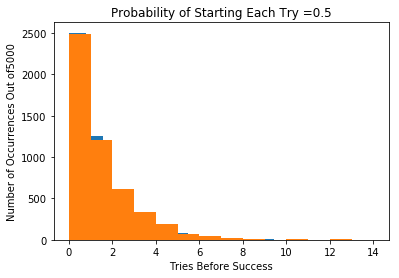

In [86]:
# 幾何分布
def successfulStarts(successProb, numTrials):
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials)
pylab.hist(distribution, bins = 14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurrences Out of' + str(numTrials))
pylab.title('Probability of Starting Each Try =' + str(probOfSuccess))
plt.show()

## ハッシュの衝突

In [90]:
def collisionProb(n, k):
    prob = 1.0
    for i in range(1, k):
        prob = prob * ((n - i)/n)
    return 1 - prob

In [91]:
def simInsertions(numIndices, numInsertions):
    choices = range(numIndices)
    used = []
    for i in range(numInsertions):
        hashVal = random.choice(choices)
        if hashVal in used:
            return 1
        else:
            used.append(hashVal)
    return 0

def findProb(numIndices, numInsertions, numTrials):
    collisions = 0
    for t in range(numTrials):
        collisions += simInsertions(numIndices, numInsertions)
        return collisions/numTrials

In [93]:
collisionProb(1000, 50)

0.7122686568799875

In [97]:
findProb(1000, 50, 10000)

0.0001

In [95]:
collisionProb(1000, 200)

0.9999999994781328

In [98]:
findProb(1000, 200, 10000)

0.0001